In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random

#TASK 1

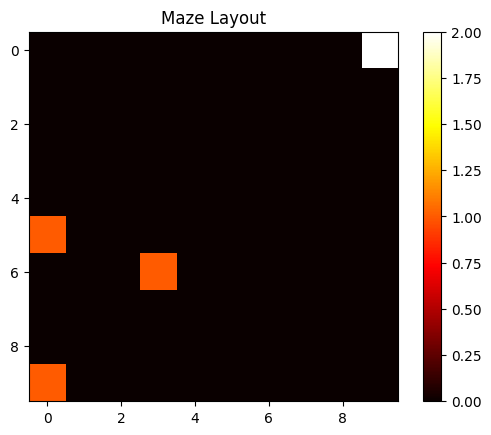

In [ ]:
def create_maze():
    # Initialize 10x10 maze with all cells as free (0)
    maze = np.zeros((10, 10))

    # Add 3 fences (walls) at random positions
    fence_positions = random.sample(range(100), 3)
    for pos in fence_positions:
        row, col = divmod(pos, 10)
        maze[row, col] = 1  # Mark the wall

    # Set the goal state at top-left corner
    maze[0, 9] = 2  # Goal at (0,0)

    return maze

def visualize_maze(maze):
    plt.imshow(maze, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.title("Maze Layout")
    plt.show()

# Create and visualize maze
maze = create_maze()
visualize_maze(maze)

#Task 2

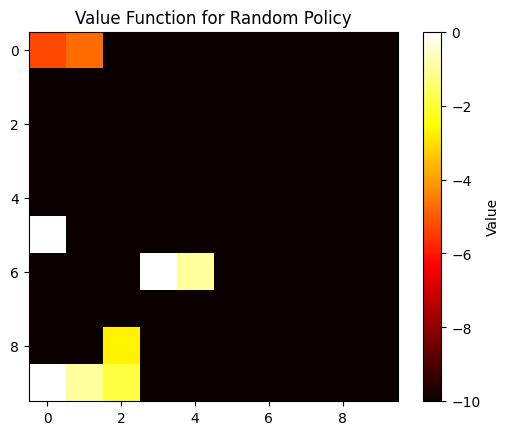

In [ ]:
def policy_evaluation(maze, policy, gamma=0.9, threshold=1e-6):
    V = np.zeros_like(maze, dtype=float)  # Initialize value function

    while True:
        delta = 0
        for row in range(maze.shape[0]):
            for col in range(maze.shape[1]):
                if maze[row, col] == 1:
                    continue

                action = policy[row, col]
                next_state, reward = step((row, col), action, maze)
                new_value = reward + gamma * V[next_state]

                # Update value function
                delta = max(delta, abs(V[row, col] - new_value))
                V[row, col] = new_value

        if delta < threshold:
            break

    return V

def step(state, action, maze):
    row, col = state
    if action == 0:  # Move up
        next_state = (max(0, row-1), col)
    elif action == 1:  # Move right
        next_state = (row, min(9, col+1))
    elif action == 2:  # Move down
        next_state = (min(9, row+1), col)
    elif action == 3:  # Move left
        next_state = (row, max(0, col-1))

    # Reward: -1 for each step, 0 for goal
    if next_state == (0, 0):  # Goal state
        return next_state, 0
    else:
        return next_state, -1

# Random policy: choose a random action for each state
random_policy = np.random.randint(0, 4, size=(10, 10))

# Evaluate random policy
V_random = policy_evaluation(maze, random_policy)
visualize_maze(V_random)


#Task 3

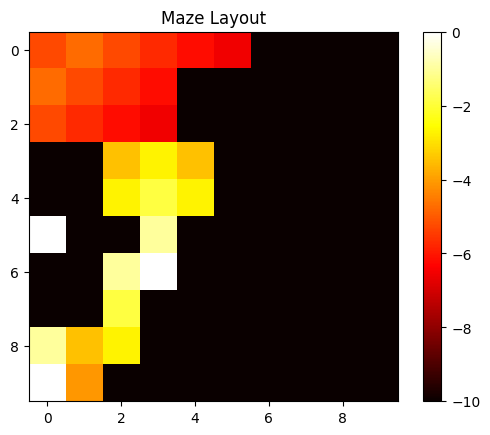

In [ ]:
def manually_set_policy(maze, goal_state=(0, 0), radius=2):
    # Initialize policy with random actions for each state
    policy = np.random.randint(0, 4, size=(10, 10))

    # Loop over all states in the maze
    for row in range(maze.shape[0]):
        for col in range(maze.shape[1]):
            if maze[row, col] == 1:  # Skip walls
                continue

            # Only adjust the policy for states within the radius of 2 from the goal
            if abs(row - goal_state[0]) <= radius and abs(col - goal_state[1]) <= radius:
                # Set optimal action towards the goal state
                if row < goal_state[0]:
                    policy[row, col] = 2  # Move down
                elif row > goal_state[0]:
                    policy[row, col] = 0  # Move up
                elif col < goal_state[1]:
                    policy[row, col] = 1  # Move right
                elif col > goal_state[1]:
                    policy[row, col] = 3  # Move left

    return policy

# Set the manually improved policy
improved_policy = manually_set_policy(maze)

# Evaluate the value function under the improved policy
V_improved = policy_evaluation(maze, improved_policy)

# Visualize the maze with the value function of the improved policy
visualize_maze(V_improved)

#Task 4

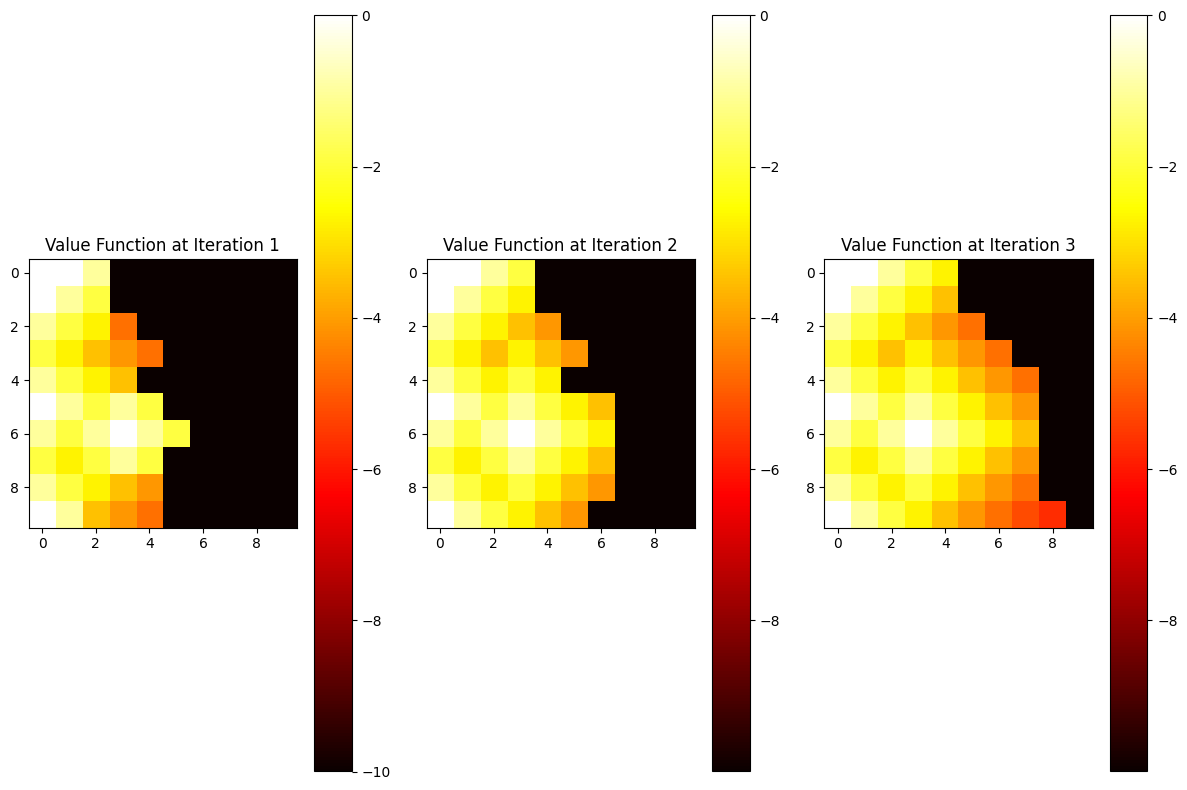

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming `step` and `policy_evaluation` functions are defined elsewhere

def policy_improvement(maze, V, gamma=0.9, max_iterations=3):
    policy = np.random.randint(0, 4, size=(10, 10))  # Initial random policy
    V_list = []  # List to store V at different iterations

    for iteration in range(max_iterations):
        stable = True
        for row in range(maze.shape[0]):
            for col in range(maze.shape[1]):
                if maze[row, col] == 1:  # Skip walls
                    continue

                old_action = policy[row, col]
                action_values = []
                for action in range(4):  # For each possible action
                    next_state, reward = step((row, col), action, maze)
                    action_value = reward + gamma * V[next_state[0], next_state[1]]  # V[s']
                    action_values.append(action_value)

                new_action = np.argmax(action_values)  # Choose action with maximum value
                policy[row, col] = new_action

                if old_action != new_action:
                    stable = False

        # Evaluate the policy at the current iteration
        V = policy_evaluation(maze, policy)
        V_list.append(V)  # Store the value function after this iteration

        if stable:
            break

    return policy, V, V_list

# Run policy improvement
optimal_policy, V_optimal, V_list = policy_improvement(maze, V_random)

# Visualize the value function at 3 different iterations
iterations_to_plot = min(3, len(V_list))  # Ensure we don't exceed available iterations

plt.figure(figsize=(12, 8))

for i in range(iterations_to_plot):
    plt.subplot(1, 3, i + 1)
    plt.imshow(V_list[i], cmap='hot', interpolation='nearest')
    plt.title(f"Value Function at Iteration {i+1}")
    plt.colorbar()

plt.tight_layout()
plt.show()

#Task 5

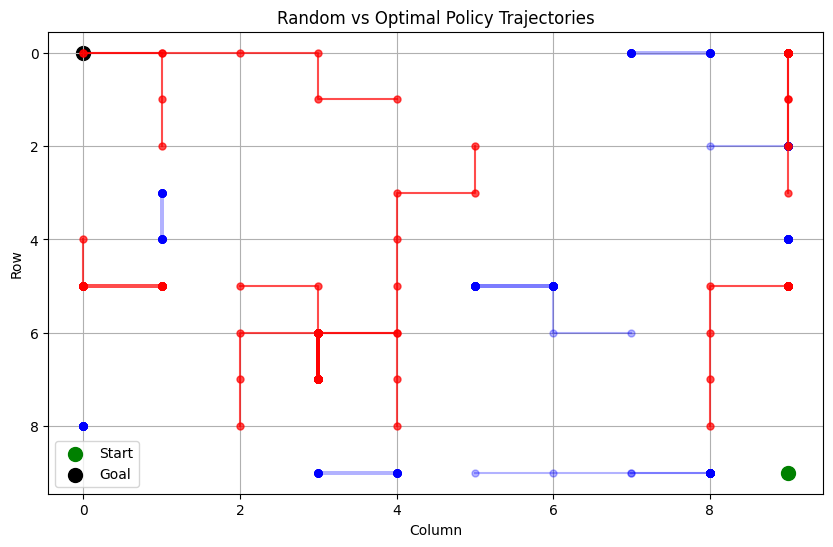

In [ ]:
import random

def generate_trajectory(initial_state, policy, maze, max_steps=50):
    state = initial_state
    trajectory = [state]
    rewards = 0
    for _ in range(max_steps):
        action = policy[state[0], state[1]]  # Use the policy's action at current state
        next_state, reward = step(state, action, maze)
        trajectory.append(next_state)
        rewards += reward
        state = next_state
        if state == (0, 0):  # If goal is reached
            break
    return trajectory, rewards

# Generate 10 trajectories using random policy
random_trajectories = [generate_trajectory((random.randint(0, 9), random.randint(0, 9)), random_policy, maze) for _ in range(10)]

# Generate 10 trajectories using optimal policy
optimal_trajectories = [generate_trajectory((random.randint(0, 9), random.randint(0, 9)), optimal_policy, maze) for _ in range(10)]

# Optional: Visualize some of the trajectories on the maze layout
plt.figure(figsize=(10, 6))

# Plot random policy trajectories
for trajectory, _ in random_trajectories:
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 1], trajectory[:, 0], marker='o', markersize=5, linestyle='-', color='blue', alpha=0.3)

# Plot optimal policy trajectories
for trajectory, _ in optimal_trajectories:
    trajectory = np.array(trajectory)
    plt.plot(trajectory[:, 1], trajectory[:, 0], marker='o', markersize=5, linestyle='-', color='red', alpha=0.7)

# Mark the start (bottom-right corner) and goal (top-left corner)
plt.scatter(9, 9, color='green', s=100, label='Start')
plt.scatter(0, 0, color='black', s=100, label='Goal')

plt.title('Random vs Optimal Policy Trajectories')
plt.xlabel('Column')
plt.ylabel('Row')
plt.legend()
plt.gca().invert_yaxis()  # Invert Y-axis to match maze layout
plt.grid(True)
plt.show()


#Task 6 (Q-Learning and SARSA)

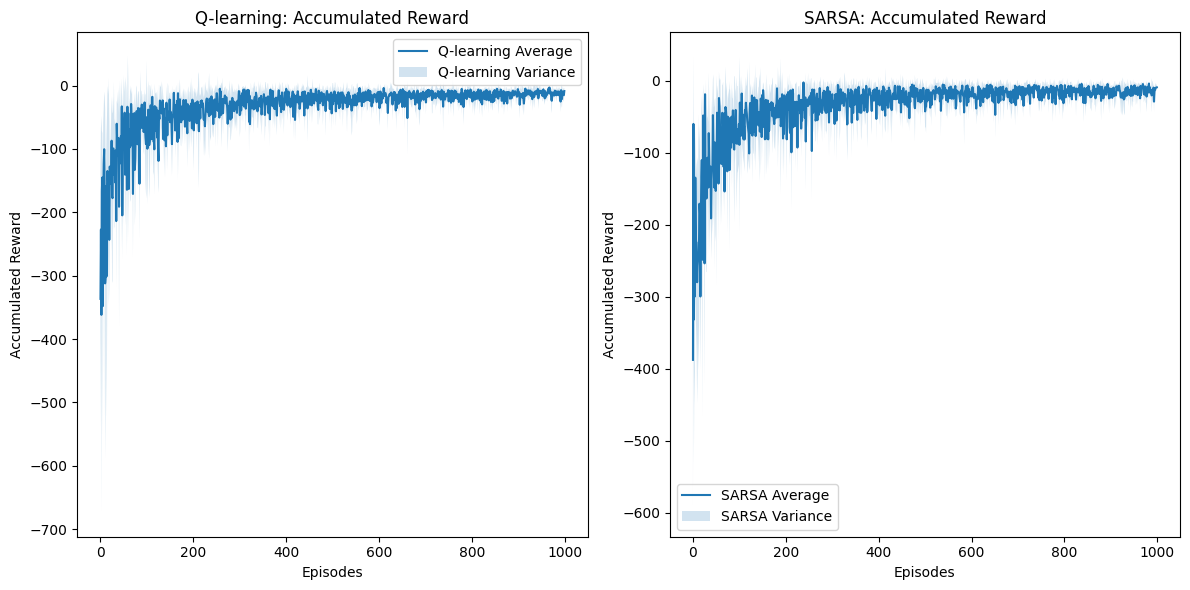

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Assuming maze, step function, and other necessary definitions are already in place

# Q-learning function
def q_learning(maze, gamma=0.9, alpha=0.1, epsilon=0.1, episodes=1000):
    Q = np.zeros((10, 10, 4))  # Initialize Q-table
    rewards_per_episode = []

    for episode in range(episodes):
        state = (random.randint(0, 9), random.randint(0, 9))  # Random initial state
        total_rewards = 0

        while state != (0, 0):  # Goal state
            # Epsilon-greedy action selection
            if random.random() < epsilon:
                action = random.randint(0, 3)
            else:
                action = np.argmax(Q[state[0], state[1]])  # Best action based on Q-table

            next_state, reward = step(state, action, maze)
            total_rewards += reward

            # Q-value update
            Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])
            state = next_state

        rewards_per_episode.append(total_rewards)

    return rewards_per_episode

# SARSA function
def sarsa(maze, gamma=0.9, alpha=0.1, epsilon=0.1, episodes=1000):
    Q = np.zeros((10, 10, 4))  # Initialize Q-table
    rewards_per_episode = []

    for episode in range(episodes):
        state = (random.randint(0, 9), random.randint(0, 9))  # Random initial state
        if random.random() < epsilon:
            action = random.randint(0, 3)
        else:
            action = np.argmax(Q[state[0], state[1]])  # Initial action based on Q-table

        total_rewards = 0

        while state != (0, 0):  # Goal state
            next_state, reward = step(state, action, maze)
            total_rewards += reward

            # Epsilon-greedy action selection for SARSA
            if random.random() < epsilon:
                next_action = random.randint(0, 3)
            else:
                next_action = np.argmax(Q[next_state[0], next_state[1]])

            # SARSA Q-value update
            Q[state[0], state[1], action] += alpha * (reward + gamma * Q[next_state[0], next_state[1], next_action] - Q[state[0], state[1], action])

            state, action = next_state, next_action

        rewards_per_episode.append(total_rewards)

    return rewards_per_episode

# Running multiple instances of Q-learning and SARSA
n_runs = 5
q_rewards_all_runs = []
sarsa_rewards_all_runs = []

for _ in range(n_runs):
    q_rewards_all_runs.append(q_learning(maze))
    sarsa_rewards_all_runs.append(sarsa(maze))

# Calculating average and variance for Q-learning
q_rewards_all_runs = np.array(q_rewards_all_runs)
q_avg_rewards = np.mean(q_rewards_all_runs, axis=0)
q_rewards_variance = np.var(q_rewards_all_runs, axis=0)

# Calculating average and variance for SARSA
sarsa_rewards_all_runs = np.array(sarsa_rewards_all_runs)
sarsa_avg_rewards = np.mean(sarsa_rewards_all_runs, axis=0)
sarsa_rewards_variance = np.var(sarsa_rewards_all_runs, axis=0)

# Plotting the results
plt.figure(figsize=(12, 6))

# Q-learning
plt.subplot(1, 2, 1)
plt.plot(q_avg_rewards, label='Q-learning Average')
plt.fill_between(range(len(q_avg_rewards)), q_avg_rewards - np.sqrt(q_rewards_variance), q_avg_rewards + np.sqrt(q_rewards_variance), alpha=0.2, label='Q-learning Variance')
plt.title('Q-learning: Accumulated Reward')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.legend()

# SARSA
plt.subplot(1, 2, 2)
plt.plot(sarsa_avg_rewards, label='SARSA Average')
plt.fill_between(range(len(sarsa_avg_rewards)), sarsa_avg_rewards - np.sqrt(sarsa_rewards_variance), sarsa_avg_rewards + np.sqrt(sarsa_rewards_variance), alpha=0.2, label='SARSA Variance')
plt.title('SARSA: Accumulated Reward')
plt.xlabel('Episodes')
plt.ylabel('Accumulated Reward')
plt.legend()

plt.tight_layout()
plt.show()
